<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Median value of owner-occupied homes: boxplot

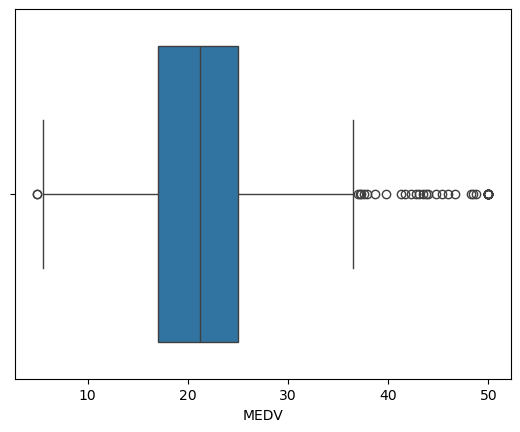

In [9]:
ax = sns.boxplot(x='MEDV', data=boston_df)

We can see that the median value is slightly above 20,000 usd with the interquartile range being around 17,000 usd to  25,000 usd. Also, there are many outliers beyond the maximum at 37,000 usd.

## Charles River variable: bar plot

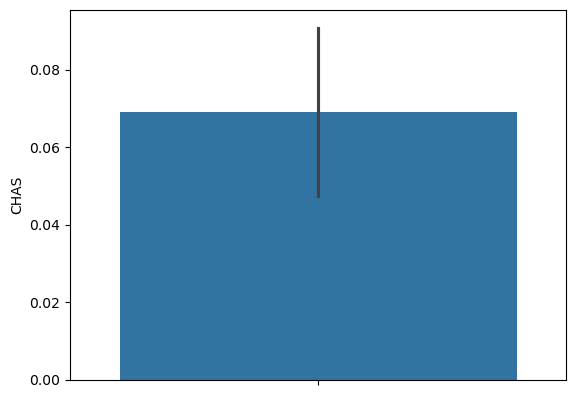

In [20]:
ax = sns.barplot(y="CHAS", data=boston_df)

We can see from this bar plot that a very small proportion of houses are are on land bound by the Charles River.

## MEDV variable vs AGE variable: boxplot

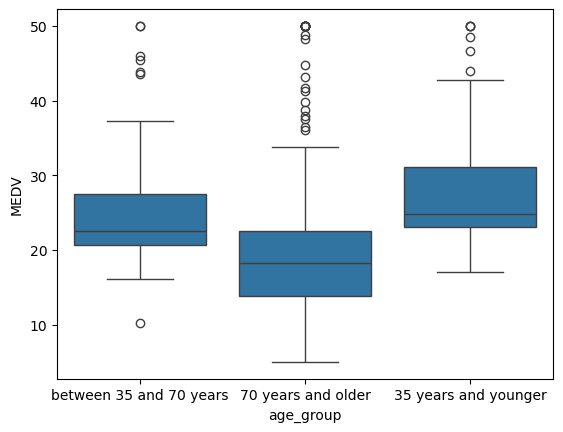

In [34]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)

We can see that the median value rises as the age of the home is smaller. For homes built within the past 35 years, the median value is approximately $25,000, between 35 and 70 years ago it is $22,000, and for older homes it is below $20,000.

## Relationship between NOX and INDUS: scatter plot

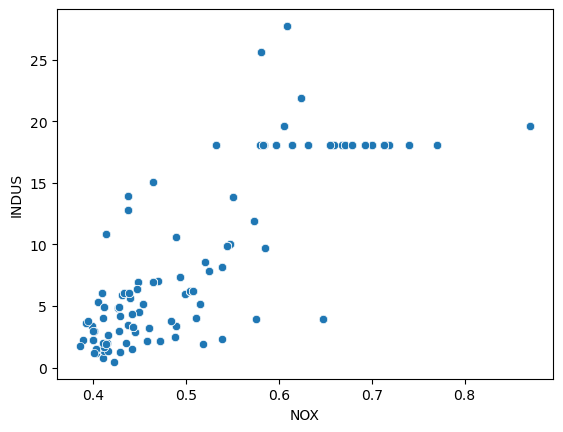

In [38]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

#### Comment on above:

The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town as shown in the scatter plot above, shows that there is a linear relatioship between the two variables as NOX concentrations rise to approximately 0.5, leading to a steady increase in the proportion of non-retail business acres per town. However, after a concentration of NOX above 0.5, the INDUS variable flattens out, meaning that the proportion stays relatively unchanged after that level of concentration.

## Pupil to teacher ratio variable: histogram

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

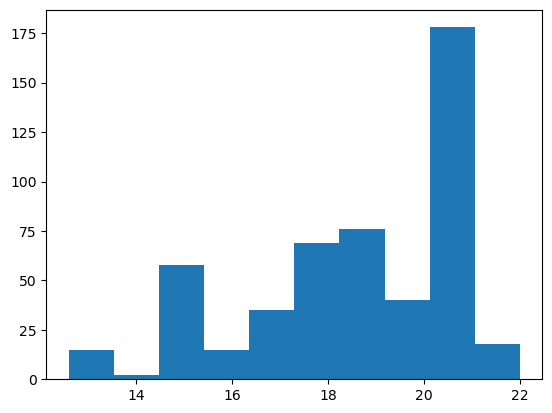

In [47]:
pyplot.hist(boston_df['PTRATIO'])

We can see that the highest concentration of homes have a pupil to teacher ratio between 20 and 22, followed by the range 17 to 19.

# Statistical Tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: average (mean) median value is the same whether the house is bounded by the Charles river

Alternative hypothesis: average (mean) median value is not the same depending on whether the house is bounded by the Charles river

α = 0.05

In [38]:
scipy.stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 1], boston_df['MEDV'][boston_df['CHAS'] == 0])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

P-value is less than 0.05, therefore we reject the null hypothesis and accept the alternative hypothesis.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Null hypothesis: average (mean) median value is the same between all proportions of owner occupied units built prior to 1940

Alternative hypothesis: average (mean) median value is not the same between all proportions of owner occupied units built prior to 1940 (at least one differs)

α = 0.05

In [27]:
thirtyfive_and_below = boston_df[boston_df ['age_group'] == '35 years and younger']['MEDV']
thirtyfive_and_below = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_and_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [29]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_and_below, thirtyfive_and_below, seventy_and_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 45.43036893270929, P-Value: 9.439763953174224e-19


P-value is less than 0.05, therefore we reject the null hypothesis and accept the alternative hypothesis.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Null hypothesis: there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

Alternative hypothesis: there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

α = 0.05


In [42]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

P-value is less than 0.05, therefore we reject the null hypothesis and accept the alternative hypothesis

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Null hypothesis: there is a relationship between the weighted distance to the five Boston employment centres on the median value of owner occupied homes

Alternative hypothesis: there is no relationship between the weighted distance to the five Boston employment centres on the median value of owner occupied homes

α = 0.05

Examining the relationship between the independent variable 'DIS' with the dependent variable 'MEDV'

In [55]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        13:02:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P-value is less than 0.05, so we reject the null hypothesis and accept that there is a relationship between the two variables.
If we add an additional unit of the variable DIS, then the impact is an additional 1.0916 units to the variable MEDV (median value of homes).